In [ ]:
from OntologyBuilder.OntologyBuilder import OntologyBuilder

In [ ]:
ob = OntologyBuilder()

In [ ]:
# abstract classes
Site = ob.add_class("Site")
Construction = ob.add_class("Construction", parent_class=Site)
Level = ob.add_class("Level", parent_class=Construction)
Room = ob.add_class("Room", parent_class=Level)
Zone = ob.add_class("Zone", parent_class=Level)
Component = ob.add_class("Component")
Property = ob.add_class("Property")
Units = ob.add_class("Units")


In [3]:
# classes
Apartment = ob.add_class("Apartment", parent_class=Zone)
Door = ob.add_class("Door", parent_class=Component)

# subclasses 
Door_leaf = ob.add_class("Door_leaf", parent_class=Door)

In [4]:
# properties
Width = ob.add_class("Width", parent_class=Property)
Height = ob.add_class("Height", parent_class=Property)
Distance = ob.add_class("Distance", parent_class=Property)

In [ ]:
# units
Millimeter = ob.add_class("Millimeter", parent_class=Units)

In [6]:
# relationships
ob.add_object_property("hasPart", "Apartment", "Door")
ob.add_object_property("hasPart", "Door", "Door_leaf")
ob.add_object_property("property", "Door_leaf", "Width")
ob.add_object_property("value", "Width", "Millimeter")
ob.add_object_property("value", "Height", "Millimeter")
ob.add_object_property("value", "Condition", "Millimeter")

ontology.value

In [7]:
# Структура проверки 
Validation = ob.add_class("Validation")

# Условия
Condition = ob.add_class("Condition", parent_class=Validation)
Condition_component_exist = ob.add_class("Condition_component_exist", parent_class=Condition)
Condition_property_value_equal = ob.add_class("Condition_property_value_equal", parent_class=Condition)

# Проверки
Check = ob.add_class("Check", parent_class=Validation)
Check_property_value_equal = ob.add_class("Check_property_value_equal", parent_class=Check)
Check_property_value_greater = ob.add_class("Check_property_value_greater", parent_class=Check)
Check_property_value_less = ob.add_class("Check_property_value_less", parent_class=Check)

# relationships
ob.add_object_property("exist", "Condition_component_exist", "Door")
ob.add_object_property("check", "Check_property_value_greater", "Millimeter")


ontology.check

In [8]:
# Требование №1 
# Ширину полотна входной двери в квартиру следует принимать не менее 0,9 м. 
# Ширину дверного проема санитарно-гигиенических помещений, межкомнатных и балконных дверей следует принимать не менее 0,80 м.

# Создание экземпляров классов
apartment_instance_1 = ob.add_individual("Apartment", "Тип квартиры №1")
door_1 = ob.add_individual("Door", "Входная дверь")
door_leaf_1 = ob.add_individual("Door_leaf", "Полотно входной двери 1")

width_door_leaf_1 = ob.add_individual("Width", "Ширина")
value_1 = ob.add_individual("Millimeter", "900")

# Связывание экземпляров классов
ob.relate_individuals(apartment_instance_1, "hasPart", door_1)
ob.relate_individuals(door_1, "hasPart", door_leaf_1)
ob.relate_individuals(door_leaf_1, "property", width_door_leaf_1)
ob.relate_individuals(width_door_leaf_1, "value", value_1)

# определение условий проверки и объекта проверки
condition = ob.add_individual("Condition_component_exist", "Условие проверки №1")
ob.relate_individuals(condition, "exist", door_1)

check = ob.add_individual("Check_property_value_greater", "Проверка №1")
ob.relate_individuals(check, "check", value_1)


# Сохранение и визуализация онтологии
ob.save_and_visualize("07_test_with_condition_and_check.owl", "08_test_with_condition_and_check.html")

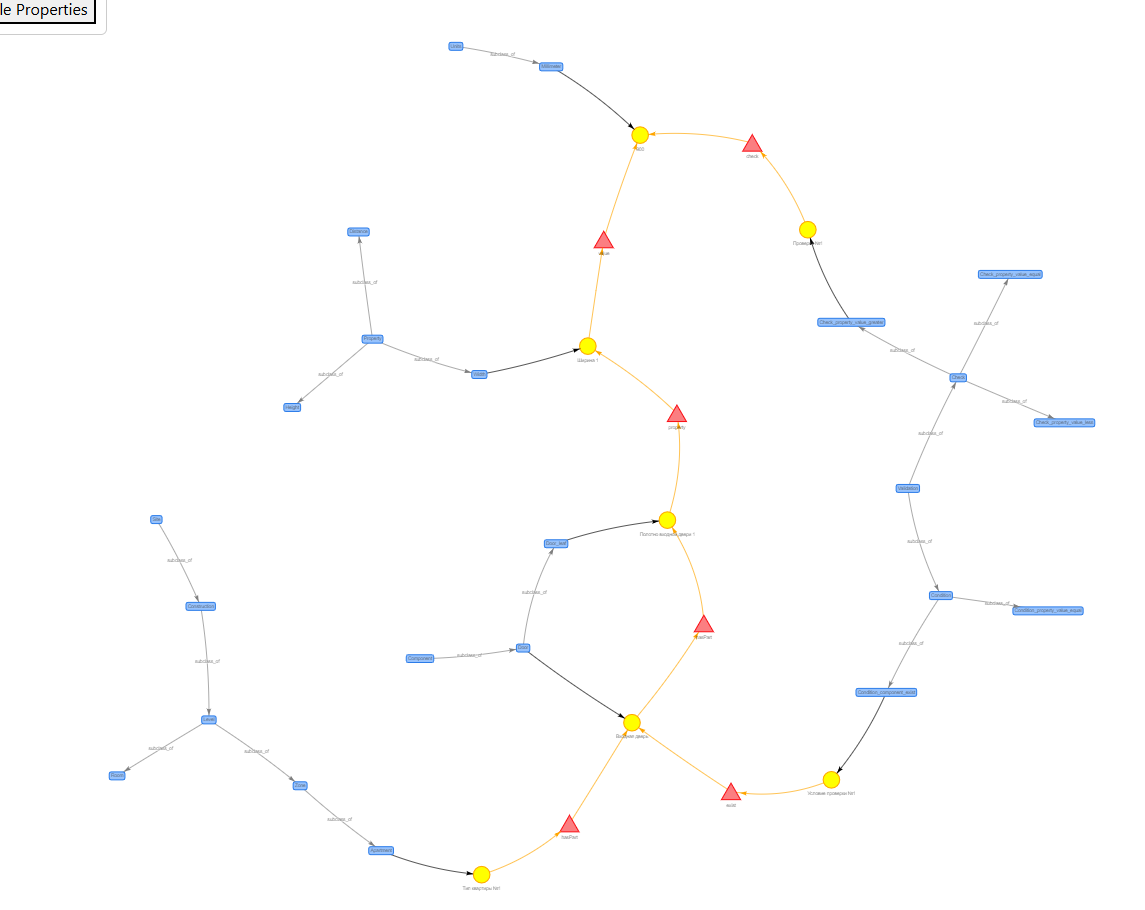